In [ ]:
import numpy as np
import cv2
from collections import deque
from matplotlib import pyplot as plt
from keras.models import load_model
import os
import tkinter
from tkinter import messagebox
from PIL import Image, ImageTk





root = tkinter.Tk()
# Create a frame
app = tkinter.Frame(root, bg="white")
app.pack()
# Create a label in the frame
lmain = tkinter.Label(app)
lmain.pack()

# Capture from camera
camera = cv2.VideoCapture(0)

# function for video streaming
def video_stream():
    #     blueLower = np.array([30, 150, 50])
#     blueUpper = np.array([255, 255, 180])
    blueLower = np.array([100, 60, 60])
    blueUpper = np.array([140, 255, 255])
    # Define a 5x5 kernel for erosion and dilation
    kernel = np.ones((5, 5), np.uint8)

    # Setup deques to store separate colors in separate arrays
    points = deque(maxlen=1024)
#     points_draw=dequeue(maxlen=1024)
#     Setup the Paint interface

    key = cv2.waitKey(1)
    (grabbed, frame) = camera.read()
    frame = cv2.flip(frame, 1)


    img = Image.fromarray(frame)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(1, video_stream) 

video_stream()
root.mainloop()

In [ ]:


from tkinter import *

root = Tk()
root.title('Model Definition')
root.resizable(width=FALSE, height=FALSE)
root.geometry('{}x{}'.format(460, 350))

top_frame = Frame(root, bg='cyan', width = 450, height=50, pady=3).grid(row=0, columnspan=3)
Label(top_frame, text = 'Model Dimensions').grid(row = 0, columnspan = 3)
Label(top_frame, text = 'Width:').grid(row = 1, column = 0)
Label(top_frame, text = 'Length:').grid(row = 1, column = 2)
entry_W = Entry(top_frame).grid(row = 1, column = 1)
entry_L = Entry(top_frame).grid(row = 1, column = 3)
#Label(top_frame, text = '').grid(row = 2, column = 2)

center = Frame(root, bg='gray2', width=50, height=40, padx=3, pady=3).grid(row=1, columnspan=3)
ctr_left = Frame(center, bg='blue', width=100, height=190).grid(column = 0, row = 1, rowspan = 2)
ctr_mid = Frame(center, bg='yellow', width=250, height=190, padx=3, pady=3).grid(column = 1, row=1, rowspan=2)
ctr_right = Frame(center, bg='green', width=100, height=190, padx=3, pady=3).grid(column = 2, row=1, rowspan=2)

btm_frame = Frame(root, bg='white', width = 450, height = 45, pady=3).grid(row = 3, columnspan = 3)
btm_frame2 = Frame(root, bg='lavender', width = 450, height = 60, pady=3).grid(row = 4, columnspan = 3)


root.mainloop()

In [ ]:
import numpy as np
import cv2
from collections import deque
from matplotlib import pyplot as plt
from keras.models import load_model
import os
import tkinter as tk
from tkinter import messagebox
from PIL import Image, ImageTk



#     blueLower = np.array([30, 150, 50])
#     blueUpper = np.array([255, 255, 180])
blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])
# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Setup deques to store separate colors in separate arrays
points = deque(maxlen=1024)
#     points_draw=dequeue(maxlen=1024)
#     Setup the Paint interface
paintWindow = np.zeros((480,670,3)) + 255 #paint window

#Set up GUI
window = tk.Tk()  #Makes main window
window.wm_title("Digital Microscope")
window.config(background="#FFFFFF")

#Graphics window
imageFrame = tk.Frame(window, width=600, height=500)
imageFrame.grid(row=0, column=0, padx=10, pady=2)

#Capture video frames
lmain = tk.Label(imageFrame)
lmain.grid(row=0, column=0)
lmain1 = tk.Label(imageFrame)
lmain1.grid(row=0, column=1)
camera = cv2.VideoCapture(0)
flag=0

def destroy_fun(event,root):
    camera.release()
    root.destroy()
def frame1(frame):
    cv2image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    img = Image.fromarray(cv2image)
    imgtk = ImageTk.PhotoImage(image=img)
    lmain.imgtk = imgtk
    lmain.configure(image=imgtk)
    lmain.after(10,frame1(frame)) 
    
def show_frame():
            
    global flag
    global window
    global imageFrame
    global paintWindow
    _, frame = camera.read()
    frame = cv2.flip(frame, 1)
    key = cv2.waitKey(1)
#     print("key",key)
    (grabbed, frame) = camera.read()
    if not grabbed:
        return

    frame = cv2.flip(frame, 1)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # Check to see if we have reached the end of the video
    blueMask = cv2.inRange(hsv, blueLower, blueUpper)
    blueMask = cv2.erode(blueMask, kernel, iterations=2)
    blueMask = cv2.morphologyEx(blueMask, cv2.MORPH_OPEN, kernel)
    blueMask = cv2.dilate(blueMask, kernel, iterations=1)

    # Find contours in the image
    cnts, x  = cv2.findContours(blueMask.copy(), cv2.RETR_EXTERNAL,
        cv2.CHAIN_APPROX_SIMPLE)
    center = None

    # Check to see if any contours were found
    if len(cnts) > 0:
        # Sort the contours and find the largest one -- we
        # will assume this contour correspondes to the area of the bottle cap
        cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
        # Get the radius of the enclosing circle around the found contour
        ((x, y), radius) = cv2.minEnclosingCircle(cnt)
        # Draw the circle around the contour
        cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
        # Get the moments to calculate the center of the contour (in this case Circle)
        M = cv2.moments(cnt)

        #finding the center of the circle
        center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
    if key==ord('q'):
        flag=1
    if key==ord('s'):
        flag=0
#     press b to pause drawing
    if key & 0xFF != ord('b'):
        if flag==0:
            points.appendleft(center)
        else:
            points.appendleft(None)
#             points_draw.appendleft(center)
    else:
        points.appendleft(None)
#             points_draw.appendleft(None)
    # Append the next deque when no contours are detected (i.e., bottle cap reversed,blue not detected
    for i in range(1,len(points)):
        if points[i-1] is None or points[i] is None:
            continue
        cv2.line(frame, points[i - 1], points[i], (255, 0, 0), 2)
        cv2.line(paintWindow, points[i - 1], points[i], (0, 0, 0), 13)
#     cv2.imshow("frM", frame)
        frame1(frame)



#     print(paintWindow.shape)
#     paintWindow=-18
#     cv2image1 = cv2.cvtColor(paintWindow, cv2.COLOR_BGR2RGB)
#     img1 = Image.fromarray(paintWindow)
#     imgtk1 = ImageTk.PhotoImage(image=img1)
#     lmain1.imgtk = imgtk1
#     lmain1.configure(image=imgtk1)
    

       
   
#     lmain1.after(10,show_frame) 
    imageFrame.focus_set()
    imageFrame.bind('<Escape>', lambda event,window=window: destroy_fun(event,window))

    
        
#                 window.deiconify()
            
        

#Slider window (slider controls stage position)
# sliderFrame = tk.Frame(window, width=600, height=100)
# sliderFrame.grid(row = 600, column=0, padx=10, pady=2)


show_frame()  #Display 2
window.mainloop()

In [2]:
from tkinter import *
 
root = Tk()  
def des(event,root):
    root.destroy()
def key(event,root):

    kp = repr(event.char)
    print ("pressed", kp) #repr(event.char))
    if (kp == 'x'):
        root.destroy()
#         print ("pressed x", repr(event.char))

def callback(event):
    frame.focus_set()

frame = Frame(root, width=100, height=100)
# frame.bind("<Key>", lambda event,root=root:key(event,root) )
frame.focus_set()
frame.bind("<Button-1>", callback)
frame.bind("<Key>", lambda event,root=root:key(event,root) )
# frame.bind("<Escape>", lambda event,root=root: des(event,root))
frame.bind("<Escape>", lambda e: root.destroy())
frame.pack()
 
root.mainloop()

In [ ]:
from PIL import Image, ImageTk
import cv2
import tkinter
from tkinter import messagebox
import os
import numpy as np
images=[]
files=[]
def message(s):
#     tkinter.messagebox.askyesno("Prediction","did u draw a ")
    print(s)
    

    
window=tkinter.Tk()
# canvas_width = 2000
# canvas_height = 600
# w = tkinter.Canvas(window,bg="white",width=canvas_width,height=canvas_height)
# w.pack()

#     panel = tkinter.Label(window, image = img)
#     panel.pack(side = "bottom", fill = "both", expand = "yes")

directory="/home/abhi/mainproject/quickdraw/doodle"
window.withdraw()

re=tkinter.messagebox.askyesno("Prediction","did u draw a ")
if re:
    new_window=tkinter.Toplevel()
    new_window.geometry("1000x150+200+650")
    new_window.configure(background='white')
    new_window.title("new")
    new_window.wm_attributes('-type', 'splash')
    i=0
    for file in os.listdir(directory):
        file="/home/abhi/mainproject/quickdraw/doodle/"+file
        files.append(file)
        t1 =Image.open(file)
        t=t1.resize((100, 100), Image.ANTIALIAS)
        img=ImageTk.PhotoImage(t)
        images.append(img)
        b=tkinter.Button(new_window)
        print(files[i])
        b.config(image=images[i],text=file,width="100",height="100",activebackground="black",bg="black", bd=0,command= lambda i=i: message(i))
        b.pack(padx=5, pady=20, side=tkinter.LEFT)
        i+=1


window.mainloop()

/home/abhi/mainproject/quickdraw/doodle/mountain.jpg
/home/abhi/mainproject/quickdraw/doodle/quickdraw.jpg
/home/abhi/mainproject/quickdraw/doodle/apple.jpg
/home/abhi/mainproject/quickdraw/doodle/car.jpg
/home/abhi/mainproject/quickdraw/doodle/star.jpg
/home/abhi/mainproject/quickdraw/doodle/cloud.jpg
/home/abhi/mainproject/quickdraw/doodle/spreadsheet.jpg
/home/abhi/mainproject/quickdraw/doodle/donut.jpg
/home/abhi/mainproject/quickdraw/doodle/church.jpg


(480, 670, 3)


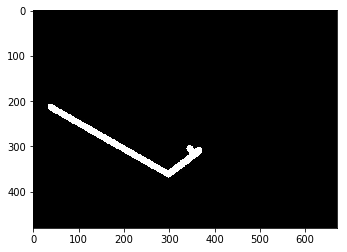

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0.0000000e+00 1.0325406e-19 0.0000000e+00 0.0000000e+00 1.0000000e+00
 5.0161898e-23 0.0000000e+00 1.0965219e-24]
class 4


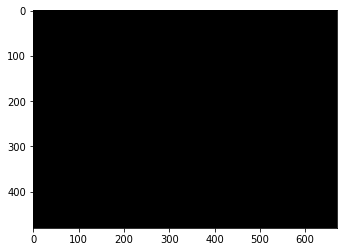

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0.14379898 0.13078353 0.16932684 0.09723811 0.11691373 0.09314648
 0.1459355  0.10285685]
class 2
helll1233
hellooo


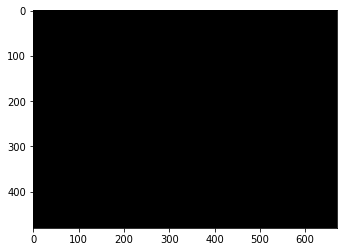

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0.14379898 0.13078353 0.16932684 0.09723811 0.11691373 0.09314648
 0.1459355  0.10285685]
class 2
helll1233
hellooo


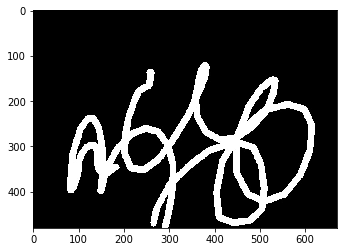

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [4.4326309e-10 0.0000000e+00 1.4978757e-17 0.0000000e+00 1.0000000e+00
 1.8293024e-16 0.0000000e+00 0.0000000e+00]
class 4
helll1233
hellooo


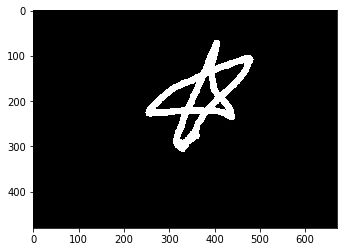

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 1. 0. 0. 0.]
class 4
helll1233
hellooo


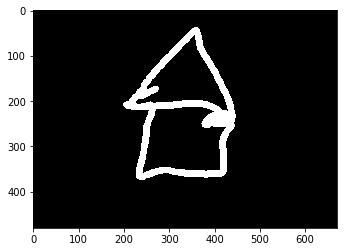

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 1. 0. 0. 0.]
class 4


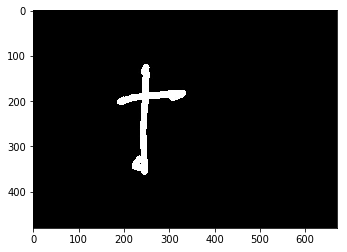

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 0. 0. 1. 0. 0. 0.]
class 4
helll1233
hellooo


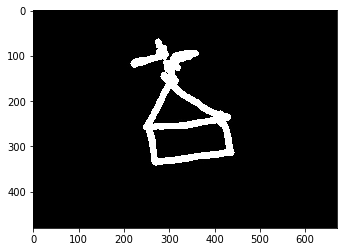

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1
helll1233
hellooo


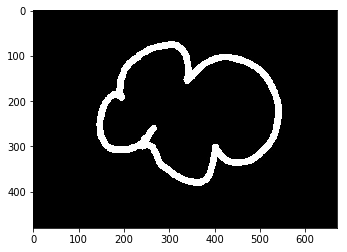

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 0. 1. 0. 0. 0. 0. 0.]
class 2
helll1233
hellooo


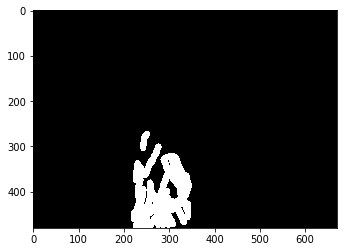

new image (1, 28, 28, 1)
processed: (1, 28, 28, 1)
prob [0. 1. 0. 0. 0. 0. 0. 0.]
class 1


In [16]:


# from ttk import *
from keras.models import load_model
import os
import tkinter as tk
from tkinter import *
import cv2
from PIL import Image, ImageTk
import os
import numpy as np
from collections import deque
from matplotlib import pyplot as plt 
from tkinter import messagebox

global last_frame                                      #creating global              variable
last_frame = np.zeros((480, 670, 3), dtype=np.uint8)
global last_frame2                                      #creating global      variable
last_frame2 = np.zeros((480, 670, 3), dtype=np.uint8)
global cap
cap = cv2.VideoCapture(0)
global doodle_url


blueLower = np.array([100, 60, 60])
blueUpper = np.array([140, 255, 255])
# Define a 5x5 kernel for erosion and dilation
kernel = np.ones((5, 5), np.uint8)

# Setup deques to store separate colors in separate arrays
points = deque(maxlen=1024)
#     points_draw=dequeue(maxlen=1024)
#     Setup the Paint interface
paintWindow = np.zeros((480,670,3)) + 255 #paint window
print(paintWindow.shape)

message=["donut","church","cloud","apple","star","car","spreadsheet","mountain"]
model=load_model("QuickDraw.h5")

flag=0
global prediction_flag
prediction_flag=0
x=0
def show_vid():
    global flag
    global points
    global paintWindow
    #creating a function
    if not cap.isOpened():                             #checks for the opening of camera
        print("cant open the camera")
    grabbed, frame = cap.read()
#     frame = cv2.resize(frame,(480,670))
    if grabbed is None:
        print ("Major error!")
    elif grabbed:
        
        frame = cv2.flip(frame, 1)
        key = cv2.waitKey(1)
#         print("key",key)
        hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
        # Check to see if we have reached the end of the video
        blueMask = cv2.inRange(hsv, blueLower, blueUpper)
        blueMask = cv2.erode(blueMask, kernel, iterations=2)
        blueMask = cv2.morphologyEx(blueMask, cv2.MORPH_OPEN, kernel)
        blueMask = cv2.dilate(blueMask, kernel, iterations=1)

        # Find contours in the image
        cnts, x  = cv2.findContours(blueMask.copy(), cv2.RETR_EXTERNAL,
            cv2.CHAIN_APPROX_SIMPLE)
        center = None

        # Check to see if any contours were found
        if len(cnts) > 0:
            # Sort the contours and find the largest one -- we
            # will assume this contour correspondes to the area of the bottle cap
            cnt = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
            # Get the radius of the enclosing circle around the found contour
            ((x, y), radius) = cv2.minEnclosingCircle(cnt)
            # Draw the circle around the contour
            cv2.circle(frame, (int(x), int(y)), int(radius), (0, 255, 255), 2)
            # Get the moments to calculate the center of the contour (in this case Circle)
            M = cv2.moments(cnt)

            #finding the center of the circle
            center = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))

    #     press b to pause drawing
        if flag==0:
            points.appendleft(center)
        else:
            points.appendleft(None)

        # Append the next deque when no contours are detected (i.e., bottle cap reversed,blue not detected
        for i in range(1,len(points)):
            if points[i-1] is None or points[i] is None:
                continue
            cv2.line(frame, points[i - 1], points[i], (255, 0, 0), 2)
            cv2.line(paintWindow, points[i - 1], points[i], (0, 0, 0), 13)
        
        
        
        
        
        global last_frame
        last_frame = frame.copy()
        global last_frame2
        last_frame2 = paintWindow.copy()
        
        
        
        
        
        
        
#         doodle=Image.open("doodle/"+"cloud"+".jpg")
        pic = cv2.cvtColor(last_frame, cv2.COLOR_BGR2RGB)     #we can change the display color of the frame gray,black&white here
        img = Image.fromarray(pic)
        imgtk = ImageTk.PhotoImage(image=img)
        lmain.imgtk = imgtk
        lmain.configure(image=imgtk)
        lmain.after(15, show_vid)


def show_vid2():
    global prediction_flag
    global paintWindow,points
#     pic2 = cv2.cvtColor(last_frame2, cv2.COLOR_RGB2GRAY)
    if prediction_flag==0:
        img2 = Image.fromarray(np.uint8(last_frame2))
        img2tk = ImageTk.PhotoImage(image=img2)
        lmain2.img2tk = img2tk
        lmain2.configure(image=img2tk)
        lmain2.after(15, show_vid2)
    if prediction_flag==1:   
        doodle=Image.open(doodle_url)
        img2tk = ImageTk.PhotoImage(image=doodle)
        lmain2.imgtk = img2tk
        lmain2.configure(image=img2tk)
        lmain2.after(15, show_vid2)
        paintWindow=np.array(doodle)
        prediction_flag=0

def erase_drawing(event):
    global points,paintWindow
    points = deque(maxlen=1024)
    paintWindow = np.zeros((480,670,3)) + 255
def stop_drawing(event):
    global flag
    flag=1
def restart_drawing(event):
    global flag
    flag=0
def process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img
def  predict(event,img):
    global x
    global message
    global last_frame2
    global doodle_url
    global prediction_flag,paintWindow,points
    cv2.imwrite(str(x)+".jpg",paintWindow)
    i=cv2.imread(str(x)+".jpg",0)
#         i=cv2.cvtColor(i,cv2.COLOR_BGR2GRAY)
    digit=cv2.bitwise_not(i)
    plt.imshow(digit,cmap="gray")
    plt.show()
    processed = process_image(digit)
    print("new image",processed.shape)

    print("processed: " + str(processed.shape))
    pred_probab = model.predict(processed)[0]
    print("prob",pred_probab)
    pred_class = list(pred_probab).index(max(pred_probab))
    print("class",pred_class)
    os.remove(str(x)+".jpg")
    msg=message[pred_class]
    result=messagebox.askyesno("Prediction","did u draw a "+msg,parent=quickdraw_window)
    if result:
        print("helll1233")
        doodle_url="doodle/"+msg+".jpg"
        prediction_flag=1
#         paintWindow[:,:,:] = 255
        points = deque(maxlen=1024)
        print("hellooo")
    else:
        quickdraw_window.deiconify()
        
        
        
if __name__ == '__main__':
    root=tk.Tk()                                     #assigning root variable        for Tkinter as tk
    
    quickdraw_window=Toplevel()
#     quickdraw_frame = tk.Frame(quickdraw_window, width=1000, height=1000)
    lmain = tk.Label(master=quickdraw_window)
    lmain2 = tk.Label(master=quickdraw_window)
#     lmain.Frame= Frame(width=768, height=576)
#     framex.grid(column=3,rowspan=2,padx=5, pady=5)
    lmain.pack(side = LEFT,padx=15)
    lmain2.pack(side=LEFT)
    root.title("QuickDraw")            #you can give any title
    root.geometry("1400x1200+50+10") #size of window , x-axis, yaxis
    quickdraw_window.title("QuickDrawframe")            #you can give any title
    quickdraw_window.geometry("1400x1200+50+10") #size of window , x-axis, yaxis
    exitbutton = Button(quickdraw_window, text='Quit',fg="red",command=   quickdraw_window.destroy).place(x=300,y=600)
    quickdraw_window.focus_set()
    quickdraw_window.bind("<Escape>", lambda event,quickdraw_window=quickdraw_window: quickdraw_window.destroy())
    quickdraw_window.bind("<r>", lambda event: erase_drawing(event))
    quickdraw_window.bind("<q>", lambda event: stop_drawing(event))
    quickdraw_window.bind("<s>", lambda event: restart_drawing(event))
    quickdraw_window.bind("<p>", lambda event: predict(event,paintWindow))
    show_vid()
    show_vid2()
    root.mainloop()                                  #keeps the application in an infinite loop so it works continuosly
    cap.release()

